<a href="https://colab.research.google.com/github/ChauNgo1106/cs480student/blob/main/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

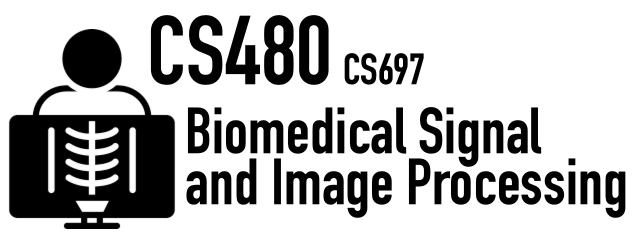
# Assignment 1


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset , in 5 minutes


In [4]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz
#array of numpy np.array
ecg
#can show the type
ecg.dtype

dtype('float64')

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

Text(0.5, 0, 'Second(s)')

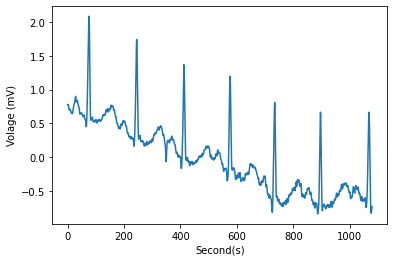

In [14]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
#SAMPLING_RATE is 360Hz, 360 signal per seconds
new_range = ecg[8*360 : 11*360 ]
plt.plot(new_range)
plt.ylabel("Volage (mV)")
plt.xlabel("Second(s)")

#doing some stuff with ecg
#ecg.shape, ecg.mean(), ecg.std(), ecg.size
#time = np.arange(ecg.size) / SAMPLING_RATE
#plt.plot(time,ecg)
#plt.xlabel("Second")
#plt.ylabel("Voltage (-mV)")
#plt.xlim(9,11)


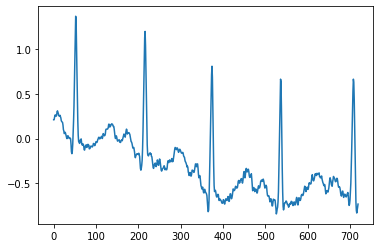

In [50]:
#360 mean for every second we can get 360
ecg[:360] #first second
ecg[360:720] #second second
ecg[720:1080] #third second

data = ecg[9*360: 11 * 360] # first second of ecg 
plt.plot(data)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [16]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 993kB 8.8MB/s 


In [23]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE) #return a dictionary in which R-peaks located, S-peaks, Q-peaks,...

In [24]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten


[ 125  343  552  748  944 1130 1317 1501 1691 1880]


[ 125  343  552  748  944 1130 1317 1501 1691 1880]


(0.0, 1000.0)

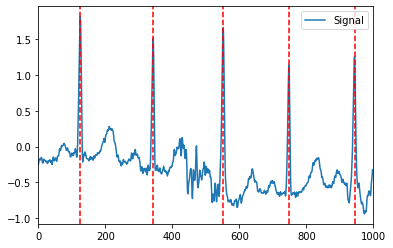

In [70]:
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten
#the whole R-peaks plot in the graph below from 5 r peaks
plot1 = nk.events_plot(rpeaks['ECG_R_Peaks'][:5] , ecg[:1000])
plt.xlim(0,1000)

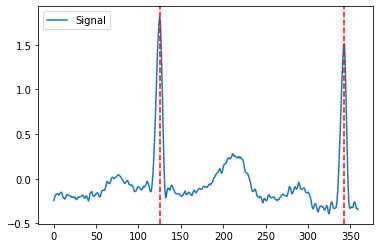

In [65]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

[ 125  343  552  748  944 1130 1317 1501 1691 1880 2065 2251 2431 2608
 2779 2956 3125 3292 3456 3614 3776 3948 4129]


(2880.0, 3960.0)

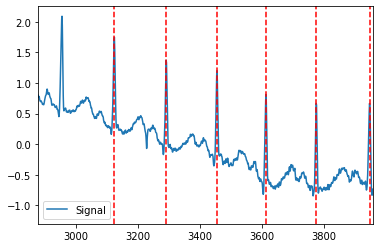

In [88]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

print(rpeaks['ECG_R_Peaks'][0:23]) #range of second 9 - 11 from 9*360 =3240 -> 11*360 = 3960 
#so rpeaks['ECG_R_Peaks'][16:23]
data = ecg[9*360 : 11 * 360] # 9 - 11 seconds
start = 8 * SAMPLING_RATE
end = 11 * SAMPLING_RATE
plot2 = nk.events_plot(rpeaks['ECG_R_Peaks'][16:23] , ecg[0 : end])
plt.xlim(start, end)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 
#No they don't, the S-T depression cause abnormal heart beat
#depession from signal 125Hz to500
#elevation of ST interval from 2000 to 3000Hz
#then depression from 3500 to 4000
#and so on with unpredicted hear beat
#==>abnormal hear rate. 


(0.0, 10000.0)

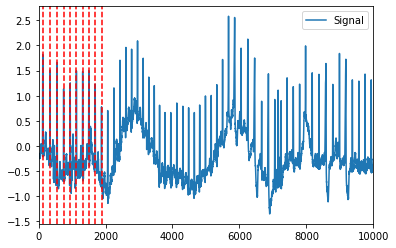

In [96]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:10], ecg[0:SAMPLING_RATE*30])
plt.xlim(0,10000)

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

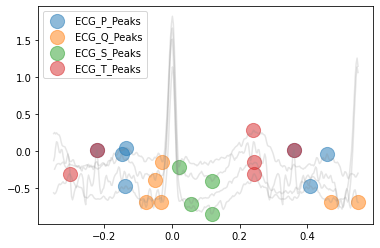

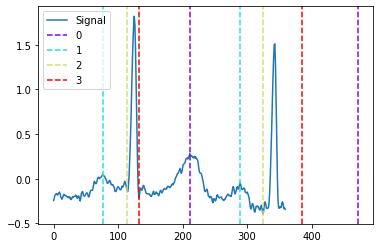

In [109]:
# TODO Does the detection work well?
#delineate the ECG signal using ecg_delineate
_,waves_peak = nk.ecg_delineate(ecg , rpeaks['ECG_R_Peaks'][0:4] , sampling_rate= SAMPLING_RATE , show = True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:2] , 
                       waves_peak['ECG_P_Peaks'][:2] ,
                       waves_peak['ECG_Q_Peaks'][:2] ,
                       waves_peak['ECG_S_Peaks'][:2]] , ecg[0:SAMPLING_RATE])


**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

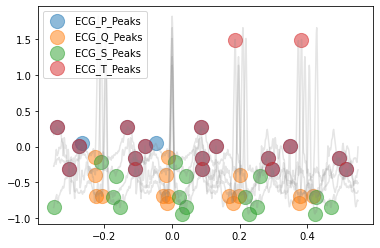

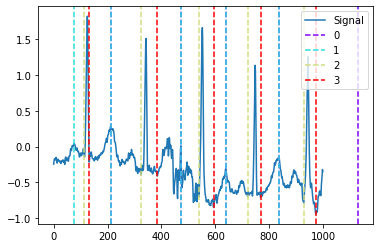

In [112]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

_,waves_peak = nk.ecg_delineate(ecg , rpeaks['ECG_R_Peaks'][0:5] , sampling_rate= 1000, show = True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5] , 
                       waves_peak['ECG_P_Peaks'][:5] ,
                       waves_peak['ECG_Q_Peaks'][:5] ,
                       waves_peak['ECG_S_Peaks'][:5]] , ecg[0:1000])

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#